# WeatherPy
----

**Analyisis**
1.	Temperature seems to have a clear correlation with latitude
2.  There is no strong relationship between latitude and cloudiness
3.  There is no strong relationship between latitude and wind speed. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from config import api_key

# added citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

#create list to for data
weather_data = []
num = 1
units = 'imperial'

print('Beginning Data Retrieval')
print('-' * 20)
for city in cities:
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    weather_response = requests.get(query_url).json()
    try:
        city_name = weather_response['name']
        country = weather_response['sys']['country']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        temp =  weather_response['main']['temp_max']
        humidity = weather_response['main']['humidity']
        clouds = weather_response['clouds']['all']
        wind_speed = weather_response['wind']['speed']
        date = weather_response['dt'] 
        city_data = {'City': city_name, 'Country': country, 'Lat': lat
                       , 'Lng': lng, 'Max Temp (F)': temp, 'Cloudiness': clouds
                       , 'Date': date, 'Humidity': humidity, 'Wind Speed Mph': wind_speed}
        weather_data.append(city_data)        
        print(f'Processing Record {num}------{city_name}')
        num += 1
    
    except(KeyError):
        print('City Not Found!')

    
        

Beginning Data Retrieval
--------------------
Processing Record 1------Kayasula
City Not Found!
Processing Record 2------Punta Arenas
Processing Record 3------Quelimane
Processing Record 4------Bengkulu
Processing Record 5------Severo-Kuril'sk
Processing Record 6------Atuona
Processing Record 7------East London
Processing Record 8------Ulladulla
City Not Found!
Processing Record 9------Murmashi
City Not Found!
City Not Found!
Processing Record 10------Matagami
Processing Record 11------Yamada
Processing Record 12------George Town
City Not Found!
Processing Record 13------Mataura
Processing Record 14------Chirongui
Processing Record 15------Husavik
Processing Record 16------Shubarkuduk
Processing Record 17------Saint Paul Harbor
Processing Record 18------Hithadhoo
Processing Record 19------Fortuna
Processing Record 20------Albany
Processing Record 21------Port Elizabeth
Processing Record 22------La Santisima Trinidad
Processing Record 23------Lingao
Processing Record 24------Mandapam
Pr

Processing Record 219------Dunedin
Processing Record 220------Taquari
Processing Record 221------Vinukonda
Processing Record 222------San Patricio
Processing Record 223------Sioux Lookout
Processing Record 224------Mitsamiouli
City Not Found!
City Not Found!
Processing Record 225------Cabo San Lucas
Processing Record 226------Clyde River
Processing Record 227------Hirara
Processing Record 228------Beidao
Processing Record 229------Asău
City Not Found!
Processing Record 230------Belfast
Processing Record 231------Samarai
Processing Record 232------Port Hardy
Processing Record 233------Arrecife
Processing Record 234------Lucapa
Processing Record 235------Sarangani
City Not Found!
City Not Found!
Processing Record 236------Miracema
Processing Record 237------Mount Gambier
Processing Record 238------Turukhansk
Processing Record 239------Sabak
Processing Record 240------Huarmey
Processing Record 241------Qaanaaq
Processing Record 242------Ilhabela
Processing Record 243------Meïganga
Process

Processing Record 434------Polokwane
Processing Record 435------Cleburne
Processing Record 436------Katsina
Processing Record 437------Henties Bay
Processing Record 438------Tigil'
Processing Record 439------Wellington
Processing Record 440------Yablonovo
Processing Record 441------Baharly
Processing Record 442------Hastings
Processing Record 443------Chanderi
Processing Record 444------Wairoa
Processing Record 445------Karratha
Processing Record 446------Auki
Processing Record 447------Liverpool
City Not Found!
Processing Record 448------Broken Hill
Processing Record 449------Bousso
City Not Found!
Processing Record 450------Zhanakorgan
Processing Record 451------Yola
Processing Record 452------Coyhaique
Processing Record 453------Oistins
Processing Record 454------Sangrur
Processing Record 455------Labytnangi
Processing Record 456------Cam Ranh
Processing Record 457------Severobaykal'sk
Processing Record 458------Erenhot
Processing Record 459------Orăştioara de Sus
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_data)
weather_df

,City,Country,Lat,Lng,Max Temp (F),Cloudiness,Date,Humidity,Wind Speed Mph
0,Kayasula,RU,44.3250,45.0000,57.63,99,1666619533,67,13.76
1,Punta Arenas,CL,-53.1500,-70.9167,46.51,75,1666619533,71,10.36
2,Quelimane,MZ,-17.8786,36.8883,85.95,0,1666619534,58,21.00
3,Bengkulu,ID,-3.8004,102.2655,76.32,100,1666619534,91,4.63
4,Severo-Kuril'sk,RU,50.6789,156.1250,37.18,91,1666619534,68,8.43
...,...,...,...,...,...,...,...,...,...
575,Varhaug,NO,58.6147,5.6457,57.47,100,1666619763,80,22.41
576,Hilsa,IN,25.3167,85.2833,82.33,64,1666619763,62,4.76
577,Blagoyevo,RU,63.3667,47.9167,32.07,99,1666619763,91,5.19
578,Bonavista,CA,48.6499,-53.1147,50.76,100,1666619658,73,13.51


In [5]:
weather_df.to_csv('../output_data/cities.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_data = weather_df[weather_df['Humidity']>100]
humidity_data
# No humity above 100 shown.  Note:  could have done it from above .df

,City,Country,Lat,Lng,Max Temp (F),Cloudiness,Date,Humidity,Wind Speed Mph


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

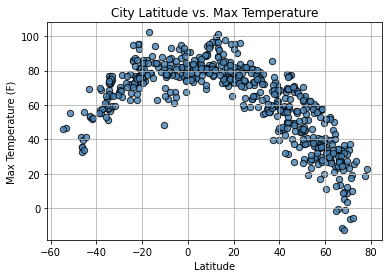

In [27]:
lat_temp_plot = weather_df.plot(kind="scatter", x="Lat", y="Max Temp (F)",grid=True, figsize=(6,4), c="steelblue", edgecolors = "black", 
                               s=40, alpha=0.8, title="City Latitude vs. Max Temperature")
lat_temp_plot.set_xlabel("Latitude")
lat_temp_plot.set_ylabel("Max Temperature (F)")
output_file = ("../output_data/latvstemp.png")
plt.savefig(output_file)
plt.show()

## Latitude vs. Humidity Plot

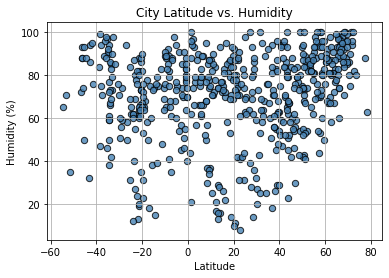

In [26]:
lat_humdity_plot = weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,figsize=(6,4), c="steelblue", edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Humidity")
lat_humdity_plot.set_xlabel("Latitude")
lat_humdity_plot.set_ylabel("Humidity (%)")
output_file2 = ("../output_data/latvshumi.png")
plt.savefig(output_file2)
plt.show()

## Latitude vs. Cloudiness Plot

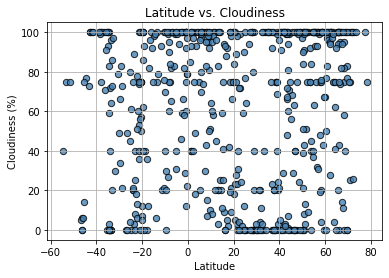

In [24]:
lat_cloudiness_plot = weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4), c="steelblue", edgecolors = "black", s=40, alpha=0.8,
              title="Latitude vs. Cloudiness")
lat_cloudiness_plot.set_xlabel("Latitude")
lat_cloudiness_plot.set_ylabel("Cloudiness (%)")
output_file3 = ("../output_data/latvscloud.png")
plt.savefig(output_file3)
plt.show()

## Latitude vs. Wind Speed Plot

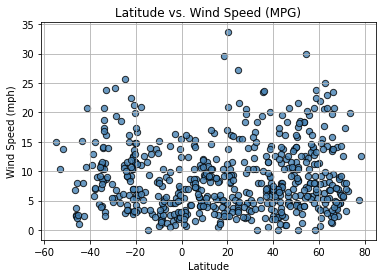

In [23]:
lat_wind_speed_plot = weather_df.plot(kind="scatter", x="Lat", y="Wind Speed Mph", grid=True, figsize=(6,4), edgecolors = "black", s=40, c="steelblue", alpha=0.8,
              title="Latitude vs. Wind Speed (MPG)")
lat_wind_speed_plot.set_xlabel("Latitude")
lat_wind_speed_plot.set_ylabel("Wind Speed (mph)")
output_file4 = ("../output_data/latvswind.png")
plt.savefig(output_file4)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [11]:
weather_df

,City,Country,Lat,Lng,Max Temp (F),Cloudiness,Date,Humidity,Wind Speed Mph
0,Kayasula,RU,44.3250,45.0000,57.63,99,1666619533,67,13.76
1,Punta Arenas,CL,-53.1500,-70.9167,46.51,75,1666619533,71,10.36
2,Quelimane,MZ,-17.8786,36.8883,85.95,0,1666619534,58,21.00
3,Bengkulu,ID,-3.8004,102.2655,76.32,100,1666619534,91,4.63
4,Severo-Kuril'sk,RU,50.6789,156.1250,37.18,91,1666619534,68,8.43
...,...,...,...,...,...,...,...,...,...
575,Varhaug,NO,58.6147,5.6457,57.47,100,1666619763,80,22.41
576,Hilsa,IN,25.3167,85.2833,82.33,64,1666619763,62,4.76
577,Blagoyevo,RU,63.3667,47.9167,32.07,99,1666619763,91,5.19
578,Bonavista,CA,48.6499,-53.1147,50.76,100,1666619658,73,13.51


The r-value is: -0.8721138477887463
 Linear Equation is : y = -1.0x + 96.26


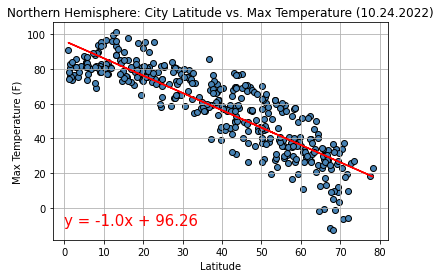

In [119]:
x_values = weather_df.loc[weather_df["Lat"] >= 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.grid()

plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (10.24.2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the closer a city is to the equator the warmer the maximum temperature is.**

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6856402148007467
 Linear Equation is : y = 0.65x + 87.06


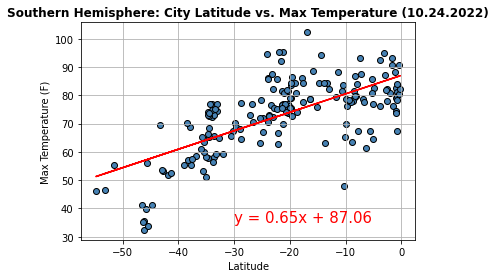

In [154]:
x_values = weather_df.loc[weather_df["Lat"] < 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] < 0, "Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(-30, 35),fontsize=15,color="red")
plt.grid()            

plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")

plt.show()

- **From the above graph, the farther a city is from the equator the cooler the maximum temperature is.**

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3065177732893861
 Linear Equation is : y = 0.31x + 60.17


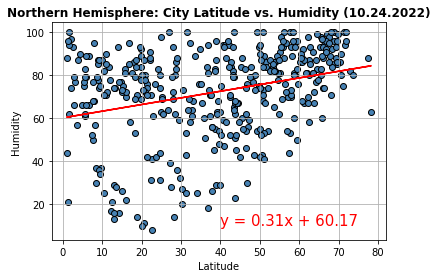

In [153]:
x_values = weather_df.loc[weather_df["Lat"] >= 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.grid()

plt.title("Northern Hemisphere: City Latitude vs. Humidity (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 31% of the data. More testing is needed to determine any correlations.**

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.05306976022801682
 Linear Equation is : y = -0.08x + 67.47


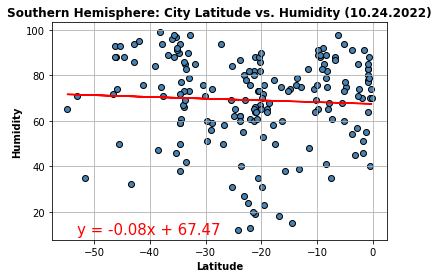

In [142]:
x_values = weather_df.loc[weather_df["Lat"] < 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] < 0, "Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(-53,10),fontsize=15,color="red")
plt.grid()

plt.title("Southern Hemisphere: City Latitude vs. Humidity (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude", fontweight='bold')
plt.ylabel("Humidity", fontweight='bold')
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 31% of the data. More testing is needed to determine any correlations.**

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09871863657712505
 Linear Equation is : y = 0.19x + 54.24


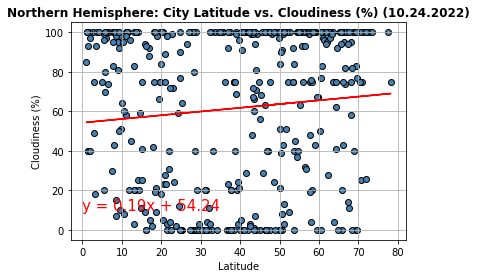

In [140]:
x_values = weather_df.loc[weather_df["Lat"] >= 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (%) (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 98% of the data. Appears to be a correlation between cloudiness of a city and how far away from the equator.**

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21281015968066627
 Linear Equation is : y = 0.57x + 72.57


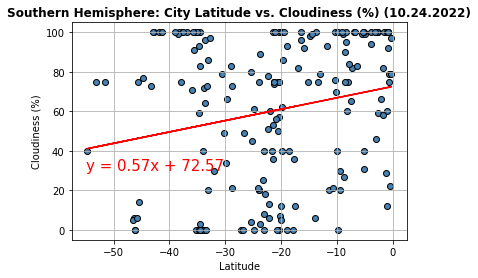

In [144]:
x_values = weather_df.loc[weather_df["Lat"] < 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] < 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(-55, 30),fontsize=15,color="red")
plt.grid()

plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (%) (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 21% of the data. There appears to be no correlation between cloudiness of a city and how far away from the Southern Hemisphere equator.**

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09871863657712505
 Linear Equation is : y = 0.19x + 54.24


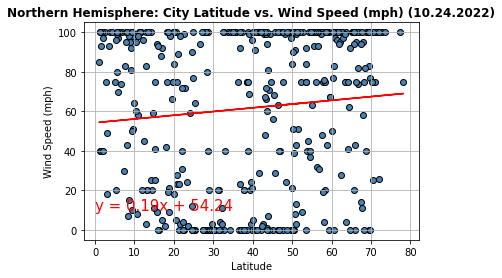

In [148]:
x_values = weather_df.loc[weather_df["Lat"] >= 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (mph) (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 989 of the data. There appears to be with certaninity no correlation between Lattitude of a city and wind speed.**

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21281015968066627
 Linear Equation is : y = 0.57x + 72.57


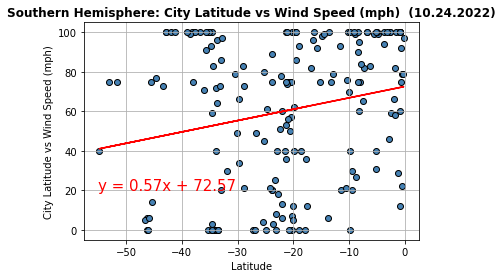

In [145]:
x_values = weather_df.loc[weather_df["Lat"] < 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] < 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.grid()

plt.title("Southern Hemisphere: City Latitude vs Wind Speed (mph)  (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("City Latitude vs Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 989 of the data. There appears to be no correlation between Lattitude of a city and wind speed in the Southern Hemisphere.**